# Data Collection

This notebook is used for collecting data for the machine learning project. It includes code and documentation for gathering and storing data in the appropriate directories.

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import argparse


data = pd.read_csv('jm1.csv')
print(data.head())

     loc  v(g)  ev(g)  iv(g)      n        v     l      d       i         e  \
0    1.1   1.4    1.4    1.4    1.3     1.30  1.30   1.30    1.30      1.30   
1    1.0   1.0    1.0    1.0    1.0     1.00  1.00   1.00    1.00      1.00   
2   72.0   7.0    1.0    6.0  198.0  1134.13  0.05  20.31   55.85  23029.10   
3  190.0   3.0    1.0    3.0  600.0  4348.76  0.06  17.06  254.87  74202.67   
4   37.0   4.0    1.0    4.0  126.0   599.12  0.06  17.19   34.86  10297.30   

   ...  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0  ...       2          2        2                  2      1.2        1.2   
1  ...       1          1        1                  1      1.0        1.0   
2  ...      51         10        8                  1     17.0       36.0   
3  ...     129         29       28                  2     17.0      135.0   
4  ...      28          1        6                  0     11.0       16.0   

   total_Op  total_Opnd  branchCount  defects  
0       1.2   

In [3]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (or handle them appropriately)
data = data.dropna()

# Convert categorical columns to numeric if necessary
# Example: data['column_name'] = data['column_name'].astype('category').cat.codes

# Split features and target
X = data.drop('defects', axis=1)  # Replace 'bug' with the actual target column name
y = data['defects']  

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64


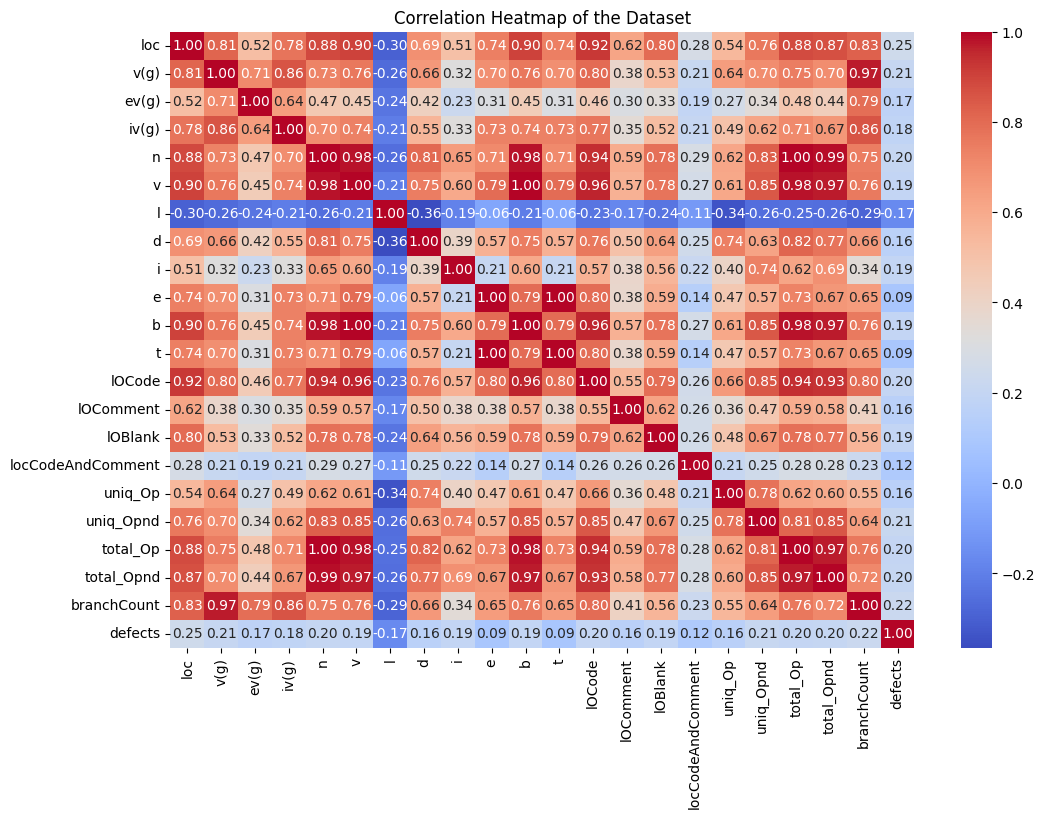

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of the Dataset")
plt.show()

C:\Users\Suyash Patil\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [01:48:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomForest Metrics:
Accuracy: 0.8568723968193867
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.98      0.92      2217
        True       0.66      0.23      0.34       424

    accuracy                           0.86      2641
   macro avg       0.76      0.60      0.63      2641
weighted avg       0.83      0.86      0.83      2641


XGBoost Metrics:
Accuracy: 0.8466489965921999
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.97      0.91      2217
        True       0.57      0.19      0.29       424

    accuracy                           0.85      2641
   macro avg       0.71      0.58      0.60      2641
weighted avg       0.82      0.85      0.81      2641



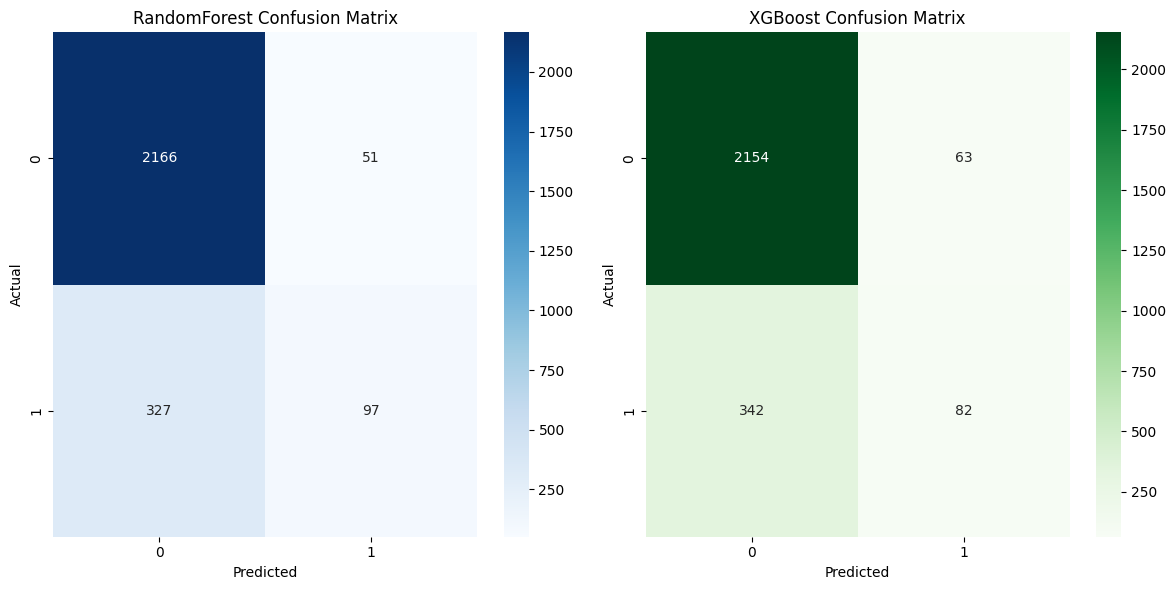

In [5]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Train XGBoostClassifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate RandomForest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_classification_report = classification_report(y_test, rf_y_pred)
rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_classification_report = classification_report(y_test, xgb_y_pred)
xgb_confusion_matrix = confusion_matrix(y_test, xgb_y_pred)

# Print Metrics
print("RandomForest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:\n", rf_classification_report)

print("\nXGBoost Metrics:")
print(f"Accuracy: {xgb_accuracy}")
print("Classification Report:\n", xgb_classification_report)

# Plot Confusion Matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("RandomForest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(xgb_confusion_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

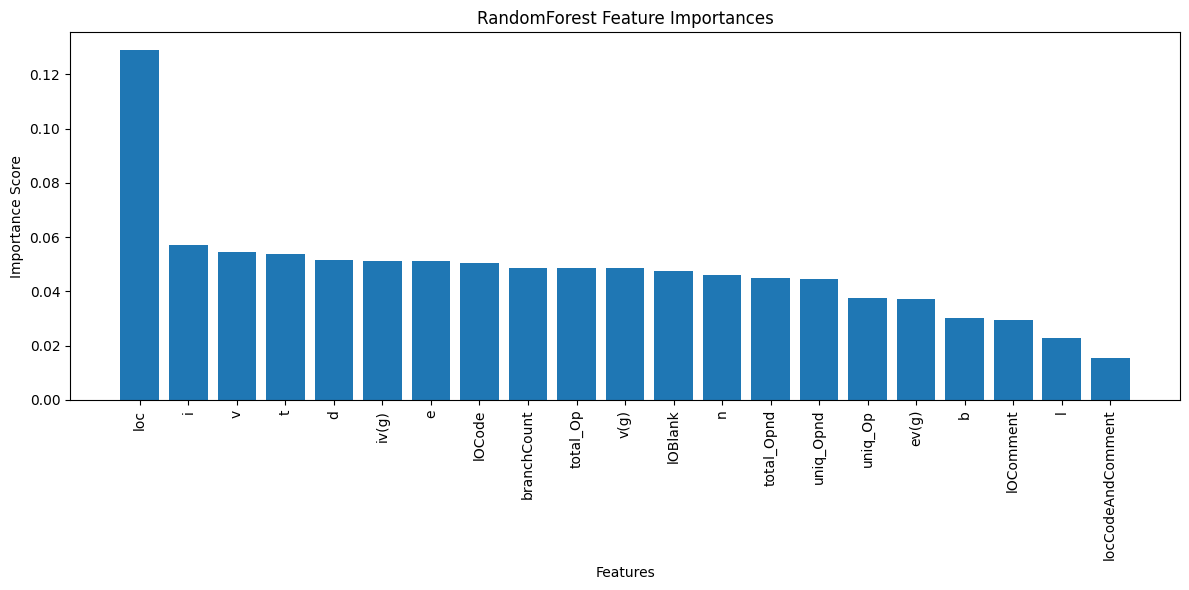

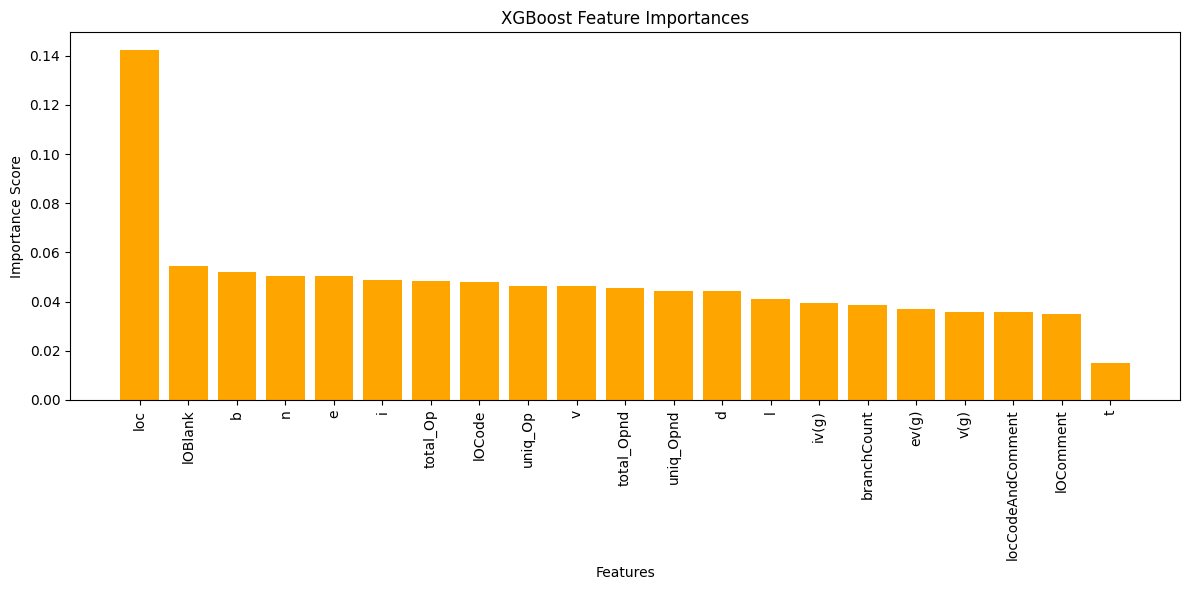

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# RandomForest Feature Importance
rf_feature_importances = rf_model.feature_importances_
rf_sorted_indices = np.argsort(rf_feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), rf_feature_importances[rf_sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[rf_sorted_indices], rotation=90)
plt.title("RandomForest Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# XGBoost Feature Importance
xgb_feature_importances = xgb_model.feature_importances_
xgb_sorted_indices = np.argsort(xgb_feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), xgb_feature_importances[xgb_sorted_indices], align="center", color="orange")
plt.xticks(range(X.shape[1]), X.columns[xgb_sorted_indices], rotation=90)
plt.title("XGBoost Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

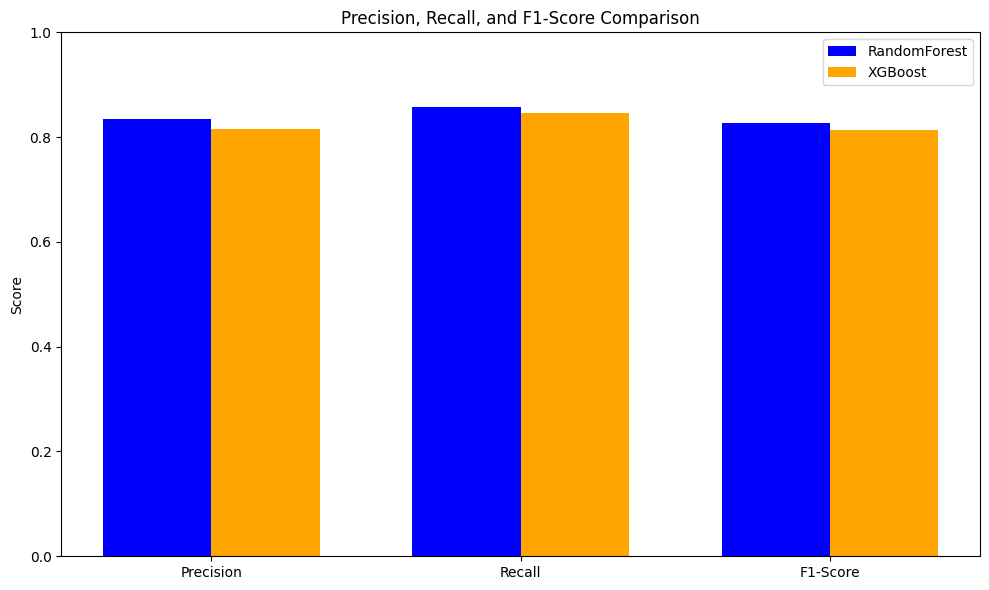

In [7]:
# Extract metrics from classification reports
from sklearn.metrics import precision_recall_fscore_support

rf_metrics = precision_recall_fscore_support(y_test, rf_y_pred, average='weighted')
xgb_metrics = precision_recall_fscore_support(y_test, xgb_y_pred, average='weighted')

metrics = ['Precision', 'Recall', 'F1-Score']
rf_values = [rf_metrics[0], rf_metrics[1], rf_metrics[2]]
xgb_values = [xgb_metrics[0], xgb_metrics[1], xgb_metrics[2]]

# Plot metrics comparison
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, rf_values, width, label='RandomForest', color='blue')
plt.bar(x + width/2, xgb_values, width, label='XGBoost', color='orange')

plt.xticks(x, metrics)
plt.title("Precision, Recall, and F1-Score Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()



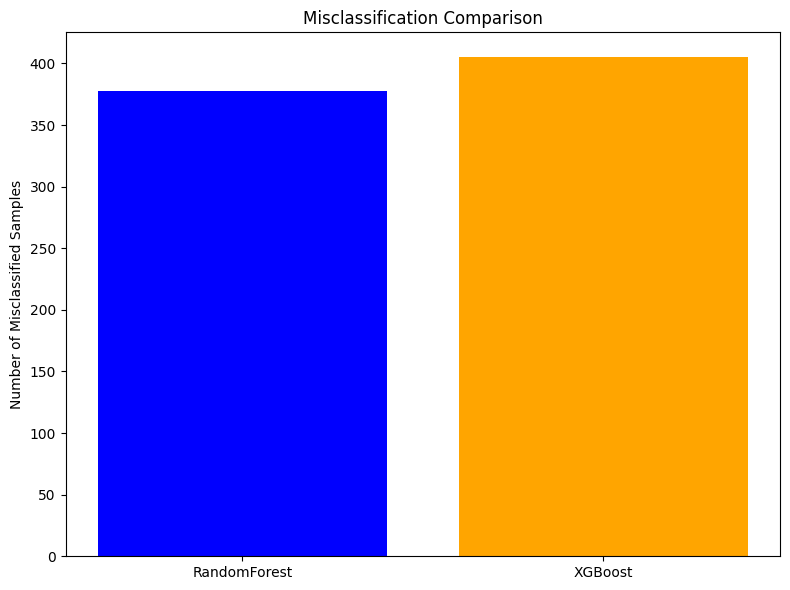

In [8]:
# Identify misclassified samples
rf_misclassified = (y_test != rf_y_pred).sum()
xgb_misclassified = (y_test != xgb_y_pred).sum()

# Plot misclassification comparison
plt.figure(figsize=(8, 6))
plt.bar(['RandomForest', 'XGBoost'], [rf_misclassified, xgb_misclassified], color=['blue', 'orange'])
plt.title("Misclassification Comparison")
plt.ylabel("Number of Misclassified Samples")
plt.tight_layout()
plt.show()

In [10]:
# Save the RandomForest model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save the XGBoost model
joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']